<a href="https://colab.research.google.com/github/gibiee/Measure_BoneAge/blob/master/%EB%BC%88%20%EB%82%98%EC%9D%B4%20%EC%B8%A1%EC%A0%95(Female%20%EC%A0%84%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip -q "./drive/My Drive/양재 팀프로젝트/뼈 나이 측정/BoneAge_Dataset.zip" -d dataset
!ls

dataset  drive	sample_data


In [ ]:
import tensorflow as tf

# female_model = tf.keras.applications.Xception(weights=None, include_top=True, input_shape=(224,224,1), classes=1, classifier_activation=None)
female_model = tf.keras.applications.InceptionV3(weights=None, include_top=True, input_shape=(224,224,1), classes=1, classifier_activation=None)

# print(model.summary())

In [ ]:
'''
# 각 레이어에서 어떤 activation function을 쓰는지 확인
for layer in model.layers :
    try :
        print(layer.activation)
    except:
        print("Activation function 없음")
'''

In [ ]:
female_model.compile(loss='mae', optimizer='adam')

In [ ]:
import pandas as pd

csv_train=pd.read_csv('./dataset/train_csv.csv')
csv_train.head()

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


In [ ]:
for i in range(len(csv_train['id'])):
  csv_train.loc[i,"id"] = f"{csv_train['id'][i]}.png"

csv_train.head()

,id,boneage,male
0,1377.png,180,False
1,1378.png,12,False
2,1379.png,94,False
3,1380.png,120,True
4,1381.png,82,False


In [ ]:
female_df = csv_train.loc [csv_train.male != True]
female_df.head()

,id,boneage,male
0,1377.png,180,False
1,1378.png,12,False
2,1379.png,94,False
4,1381.png,82,False
10,1388.png,126,False


In [ ]:
len(female_df)

5778

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(female_df, directory='./dataset/train/', x_col='id', y_col='boneage',
                                              target_size=(224,224), color_mode='grayscale',
                                              class_mode='raw', subset='training')
valid_generator = datagen.flow_from_dataframe(female_df, directory='./dataset/train/', x_col='id', y_col='boneage',
                                              target_size=(224,224), color_mode='grayscale', 
                                              class_mode='raw', subset='validation', shuffle=False)

Found 4623 validated image filenames.
Found 1155 validated image filenames.


In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', save_best_only=True,
                                                filepath="./drive/My Drive/양재 팀프로젝트/뼈 나이 측정/checkpoint_female.h5")

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = female_model.fit_generator(train_generator, validation_data=valid_generator, epochs=100, callbacks=[checkpoint, early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
145/145 [==============================] - 171s 1s/step - loss: 56.4112 - val_loss: 27189.7637
Epoch 2/100
145/145 [==============================] - 153s 1s/step - loss: 22.2096 - val_loss: 55.2878
Epoch 3/100
145/145 [==============================] - 149s 1s/step - loss: 17.3161 - val_loss: 52.8870
Epoch 4/100
145/145 [==============================] - 149s 1s/step - loss: 14.2879 - val_loss: 35.3259
Epoch 5/100
145/145 [==============================] - 150s 1s/step - loss: 13.4373 - val_loss: 34.6864
Epoch 6/100
145/145 [==============================] - 149s 1s/step - loss: 12.1585 - val_loss: 31.0249
Epoch 7/100
145/145 [==============================] - 146s 1s/step - loss: 11.6755 - val_loss: 32.9099
Epoch 8/100
145/145 [==============================] - 148s 1s/step - loss: 11.2063 - val_loss: 30.7363
Epoch 9/100
145/145 [==============================] - 145s 999ms/step - loss: 10.6479 - 

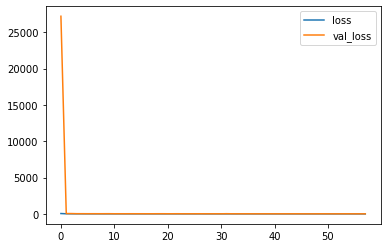

In [ ]:
# 학습 과정에서의 loss와 val_loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

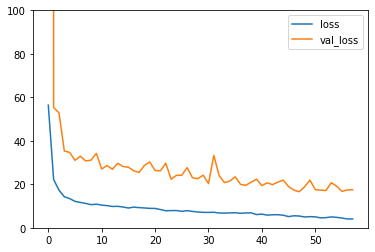

In [ ]:
# 학습 과정에서의 loss와 val_loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,100)
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
# 예측값과 정답값을 비교
load_model = tf.keras.models.load_model("./drive/My Drive/양재 팀프로젝트/뼈 나이 측정/checkpoint_female.h5")

predict = load_model.predict_generator(valid_generator).flatten()

compare = pd.DataFrame({"id" : valid_generator.filenames,
                        "예측" : predict,
                        "정답" : valid_generator.labels})
compare.head(20)

Instructions for updating:
Please use Model.predict, which supports generators.


,id,예측,정답
0,1377.png,175.497482,180
1,1378.png,103.227188,12
2,1379.png,121.754311,94
3,1381.png,73.472961,82
4,1388.png,124.876068,126
5,1393.png,136.494446,132
6,1395.png,118.637497,120
7,1396.png,157.672165,188
8,1398.png,102.362648,4
9,1399.png,63.452446,36


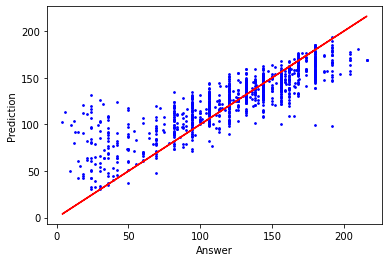

In [ ]:
# 최종 결과값과 예측값 비교 시각화
import matplotlib.pyplot as plt

plt.scatter(valid_generator.labels, predict, color='b', s=3)
plt.plot(valid_generator.labels, valid_generator.labels, 'r')
plt.xlabel("Answer")
plt.ylabel("Prediction")
plt.show()